In [32]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
# 添加父目录到 Python 路径
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# 导入需要的模块
from src.utils import SolverConfig, RadialGrid, PotentialFunction, WavefunctionTools, get_theoretical_values
from src.solver import ShootingSolver, FiniteDifferenceSolver
from src.analysis import WavefunctionProcessor, EnergyAnalyzer, ConvergenceAnalyzer
from src.visualization import ResultVisualizer

# 测试导入是否成功
print("模块导入成功!")

模块导入成功!


In [33]:
test_config = SolverConfig(method="shooting",n=2,l=1)
print(vars(test_config))
test_grid = RadialGrid(test_config)
grid_info = test_grid.get_grid_info()
print(vars(test_grid))

{'r_max': 30.0, 'r_min': 1e-08, 'j_max': 1000, 'delta': 0.006, 'l': 1, 'n': 2, 'n_states': 3, 'V_type': 'hydrogen', 'method': 'shooting', 'tol': 1e-08}
{'config': SolverConfig(r_max=30.0, r_min=1e-08, j_max=1000, delta=0.006, l=1, n=2, n_states=3, V_type='hydrogen', method='shooting', tol=1e-08), 'j': array([   0,    1,    2, ...,  998,  999, 1000]), 'r_p': 0.07454734968048846, 'r': array([1.00000000e-08, 4.48638638e-04, 8.99967140e-04, ...,
       2.96412622e+01, 2.98200930e+01, 3.00000000e+01]), 'dr': array([0.00044863, 0.00045133, 0.00045404, 0.00045678, 0.00045953,
       0.00046229, 0.00046507, 0.00046787, 0.00047069, 0.00047352,
       0.00047637, 0.00047924, 0.00048212, 0.00048502, 0.00048794,
       0.00049088, 0.00049383, 0.0004968 , 0.00049979, 0.0005028 ,
       0.00050583, 0.00050887, 0.00051193, 0.00051501, 0.00051811,
       0.00052123, 0.00052437, 0.00052752, 0.0005307 , 0.00053389,
       0.00053711, 0.00054034, 0.00054359, 0.00054686, 0.00055015,
       0.00055346, 0.0

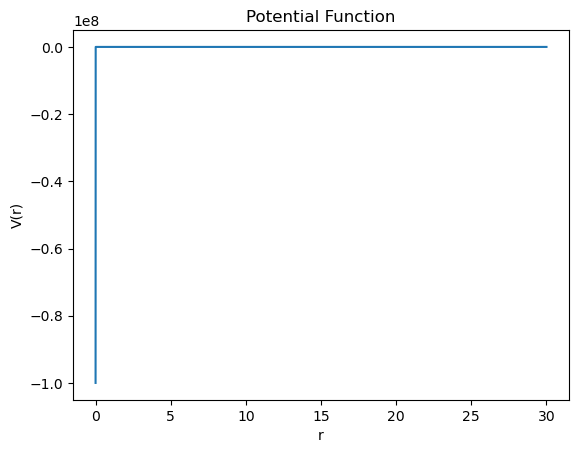

In [34]:
test_V = PotentialFunction.get_potential("hydrogen")


r_values = grid_info["r"]
V_values = [test_V(r) for r in r_values]
plt.plot(r_values, V_values)
plt.xlabel('r')
plt.ylabel('V(r)')
plt.title('Potential Function')
plt.show()

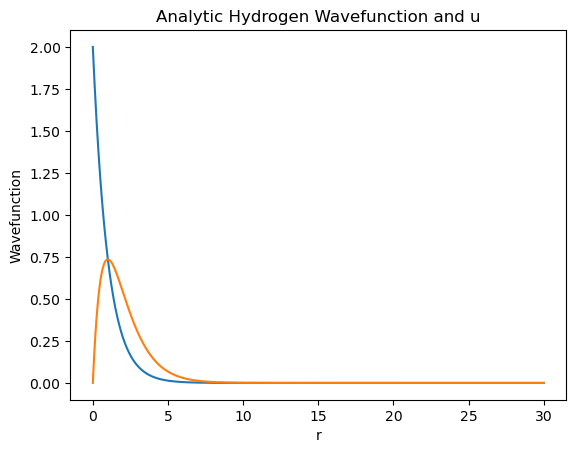

In [35]:
test_tools = WavefunctionTools()
analytic_wavefunction = test_tools.get_analytic_hydrogen(r_values,1,0)
analytic_u = analytic_wavefunction*r_values
analytic_u_nodes = test_tools.count_nodes(analytic_u)
plt.plot(r_values, analytic_wavefunction)
plt.plot(r_values, analytic_u)
plt.xlabel('r')
plt.ylabel('Wavefunction')
plt.title('Analytic Hydrogen Wavefunction and u')
plt.show()

In [36]:
#utils测试完毕，下面进行analysis测试
test_wave_processor = WavefunctionProcessor(r_values,0,test_config.delta)
print(vars(test_wave_processor))

{'r': array([1.00000000e-08, 4.48638638e-04, 8.99967140e-04, ...,
       2.96412622e+01, 2.98200930e+01, 3.00000000e+01]), 'l': 0, 'delta': 0.006, 'j': array([   0,    1,    2, ...,  998,  999, 1000]), 'r_p': 0.07454734970533758, 'dr_dj': array([0.00044728, 0.00044998, 0.00045268, ..., 0.17829486, 0.17936784,
       0.18044728])}


r values where the first derivative is zero: [0.98907375 0.99547466 1.00191409 1.00839228]


Text(0.5, 0, 'r')

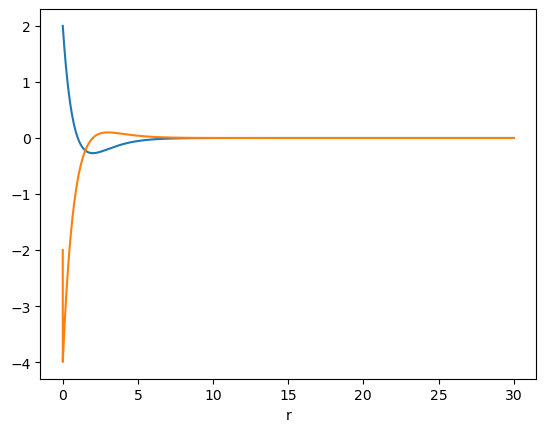

In [37]:
test_du_dr ,test_d2u_dr2 = test_wave_processor.get_derivatives(analytic_u)
# 找一阶导数为0的r值
zero_derivative_indices = np.where((np.isclose(test_du_dr, 0, atol=1e-2)) & (r_values <= 5))[0]
r_zero_derivative = r_values[zero_derivative_indices]
print("r values where the first derivative is zero:", r_zero_derivative)

plt.plot(r_values, test_du_dr)
plt.plot(r_values, test_d2u_dr2)
plt.xlabel('r')



In [38]:
m_analyze,n_analyze = test_wave_processor.analyze_asymptotic(analytic_u,num_points=5)
#似乎结果不太对，不过先不管

r0_values = test_wave_processor.get_r0_values(analytic_u)

In [39]:
analytic_u_uniform ,analytic_R_uniform= test_wave_processor.normalize_wavefunction(analytic_u)

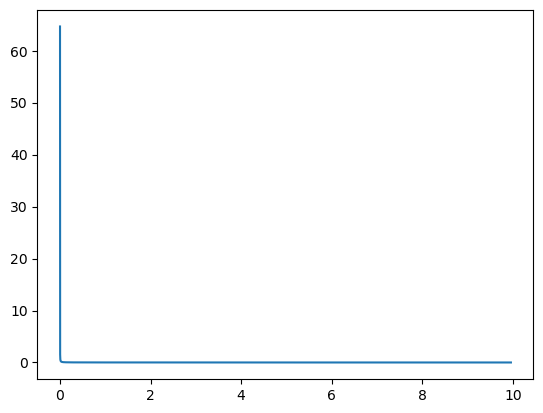

In [ ]:
#进入solver检验
test_shooting  = ShootingSolver(test_grid,test_V,1)
u_shoot = test_shooting.integrate_inward(-1/8)
plt.plot(r_values[r_values <= 10], u_shoot[r_values <= 10])


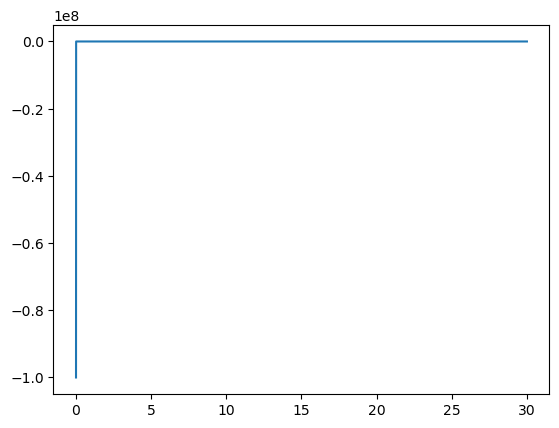

In [41]:
# 查看 ShootingSolver 实例的属性和方法
V_eff_test = test_shooting.V_eff(test_grid.j)
plt.plot(r_values, V_eff_test)